### **หาความสัมพันธ์ของแผนผังต้นไม้ในลักษณะเชิงลำดับชั้นของกลุ่ม Dendrogram**

### **1.Import Library + Load DataSets**

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [22]:
df=pd.read_csv('https://raw.githubusercontent.com/prasertcbs/basic-dataset/refs/heads/master/BaskinRobbins.csv')
df

,Flavour,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g)
0,Bananas Foster,160,8.0,0.2,20,16,2.0
1,Baseball Nut,160,9.0,0.2,19,13,3.0
2,Beavertails Pastry,170,9.0,0.3,21,15,3.0
3,Blackberry Frozen Yogurt,120,4.0,0.1,17,16,3.0
4,Blue Raspberry Sherbet,130,2.0,0.1,26,20,2.0
...,...,...,...,...,...,...,...
65,Very Berry Strawberry,200,10.0,0.4,24,21,4.0
66,Watermelon Splash,120,0.5,0.0,27,20,0.1
67,Wild ‘n Reckless,80,1.5,0.0,16,12,1.0
68,Winter White Chocolate,160,8.0,0.2,20,16,2.0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Flavour            70 non-null     object 
 1   Calories           70 non-null     int64  
 2   Total Fat (g)      70 non-null     float64
 3   Trans Fat (g)      70 non-null     float64
 4   Carbohydrates (g)  70 non-null     int64  
 5   Sugars (g)         70 non-null     int64  
 6   Protein (g)        70 non-null     float64
dtypes: float64(3), int64(3), object(1)
memory usage: 4.0+ KB


In [24]:
df.describe()

,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g)
count,70.000000,70.000000,70.000000,70.0000,70.000000,70.000000
mean,191.714286,10.562857,0.277143,22.9000,16.914286,3.567143
std,61.643468,7.947275,0.145633,5.4511,4.497158,1.679175
min,70.000000,0.000000,0.000000,13.0000,4.000000,0.000000
25%,152.500000,7.250000,0.200000,18.0000,14.000000,3.000000
50%,180.000000,10.000000,0.300000,21.0000,17.000000,3.500000
75%,240.000000,13.750000,0.400000,27.0000,20.000000,5.000000
max,330.000000,60.000000,0.500000,38.0000,28.000000,8.000000


### **2.เลือกฟีเจอร์**

In [25]:
x = df[['Calories', 'Total Fat (g)', 'Sugars (g)']]
x.head()

,Calories,Total Fat (g),Sugars (g)
0,160,8.0,16
1,160,9.0,13
2,170,9.0,15
3,120,4.0,16
4,130,2.0,20


### **3.Features Scaling ปรับให้น้ำหนักมีค่าใกล้เคียงกัน**

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled[:5]
#fit คำนวณค่าเฉลี่ยและส่วนเบี่ยงเบนมาตรฐาน
#transform แปลงค่าเฉลี่ยเป็น 0 และส่วนเบี่ยงเบนมาตรฐานเป็น 1

array([[-0.51819396, -0.32481093, -0.20477091],
       [-0.51819396, -0.19807311, -0.87667545],
       [-0.35479947, -0.19807311, -0.42873909],
       [-1.17177192, -0.83176221, -0.20477091],
       [-1.00837743, -1.08523785,  0.69110182]])

### **4.สร้าง Dendrogram**

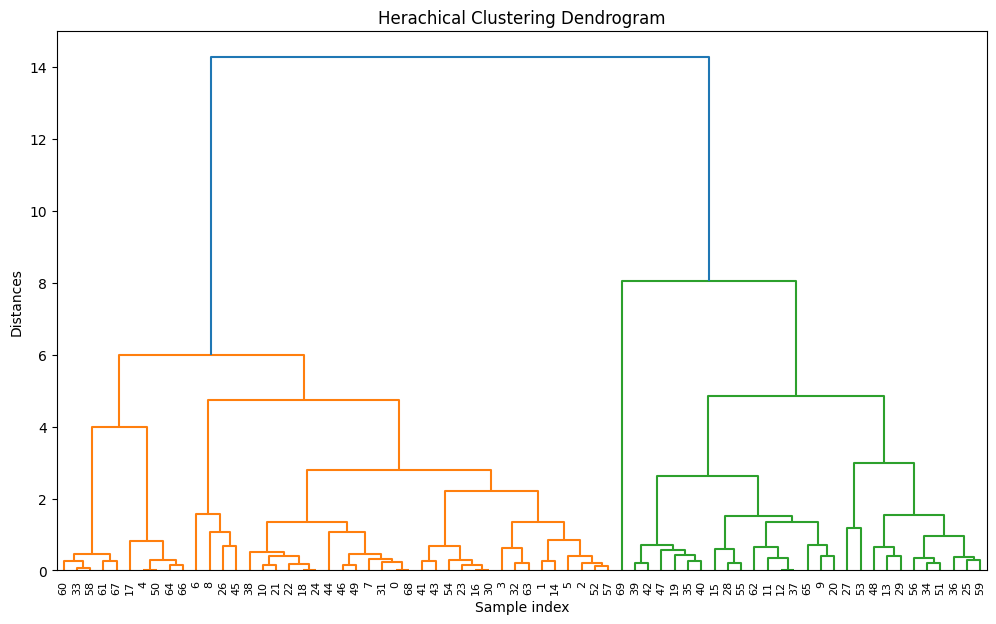

In [27]:
plt.figure(figsize=(12,7))
dendrogram(linkage(x_scaled, method='ward') , leaf_rotation=90, leaf_font_size=8)
#ward คือลดความแปรปรวนภายในแต่ละ Cluster ให้เหลือน้อยที่สุด มักใช้ Euclidean distance
#dendrogram มี 4 matrix : single, complete, average, ward
#leaf_rotation = 90 หมุนป้ายชื่อ 90 องศาให้อ่านง่ายขึ้น
#leaf_font_size = 8 กำหนดขนาดฟอนต์ของป้ายชื่อ
plt.title('Herachical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distances')
plt.show()

### **5.นำเข้าและสร้างโมเดล AgglomerativeClustering**

In [33]:
model = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
model.fit(x_scaled)
#fit สร้างลำดับชั้น

AgglomerativeClustering(n_clusters=3)

In [34]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 2])

### **6.เพิ่ม column cluster ใน DataFrame**

In [35]:
df['Cluster'] = model.labels_
df.head()

,Flavour,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g),Cluster
0,Bananas Foster,160,8.0,0.2,20,16,2.0,0
1,Baseball Nut,160,9.0,0.2,19,13,3.0,0
2,Beavertails Pastry,170,9.0,0.3,21,15,3.0,0
3,Blackberry Frozen Yogurt,120,4.0,0.1,17,16,3.0,0
4,Blue Raspberry Sherbet,130,2.0,0.1,26,20,2.0,0


In [39]:
df.Cluster.value_counts().sort_index()

,count
Cluster,
0,42
1,27
2,1


In [42]:
df.groupby('Cluster')[['Calories', 'Total Fat (g)', 'Sugars (g)']].mean()

,Calories,Total Fat (g),Sugars (g)
Cluster,,,
0,149.761905,6.819048,14.571429
1,254.444444,14.555556,20.518519
2,260.000000,60.000000,18.000000


### **7.PlotGraph เพื่อแสดง Cluster**

<Axes: xlabel='Calories', ylabel='Total Fat (g)'>

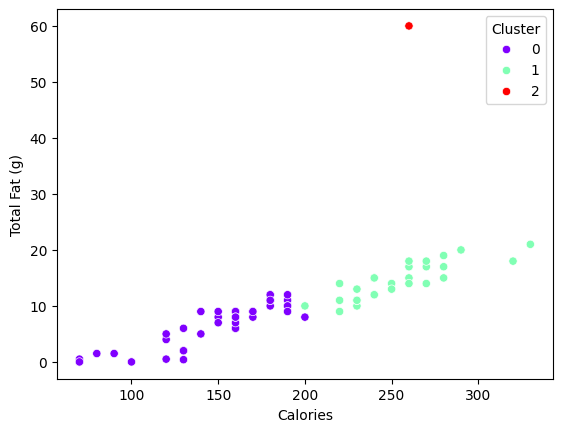

In [51]:
sns.scatterplot(data=df,x='Calories',y='Total Fat (g)',hue='Cluster',palette='rainbow')
#hue กำหนดให้สีของจุดข้อมูลแตกต่างกัน